In [8]:
import pandas as pd
data = pd.read_csv('csv_final.csv')

In [9]:
data.head(4)

,type,code,message,context,selector
0,error,WCAG2AA.Principle2.Guideline2_4.2_4_2.H25.1.No...,"A title should be provided for the document, u...","<head> <script type=\text/javascript\""...</head>""",html > head
1,error,WCAG2AA.Principle2.Guideline2_4.2_4_2.H25.1.No...,"A title should be provided for the document, u...","<head> <script type=\text/javascript\""...</head>""",html > head
2,error,WCAG2AA.Principle1.Guideline1_1.1_1_1.H37,Img element missing an alt attribute. Use the ...,"<img src=\imagem.jpg\"">""",html > body > img
3,error,WCAG2AA.Principle3.Guideline3_1.3_1_1.H57.2,The html element should have a lang or xml:lan...,<html><head>\n<title>Home</title>\n<sty...</html>,html


In [12]:
data_count = (
    data
    .groupby('code')
    .size()
    .reset_index(name='count')
    .sort_values(by=['count'], ascending=False)
)


In [13]:
data_count

,code,count
3,WCAG2AA.Principle1.Guideline1_3.1_3_1.H49.Alig...,4
5,WCAG2AA.Principle3.Guideline3_1.3_1_1.H57.2,3
1,WCAG2AA.Principle1.Guideline1_3.1_3_1.F68,2
4,WCAG2AA.Principle2.Guideline2_4.2_4_2.H25.1.No...,2
6,WCAG2AA.Principle4.Guideline4_1.4_1_2.H91.Inpu...,2
0,WCAG2AA.Principle1.Guideline1_1.1_1_1.H37,1
2,WCAG2AA.Principle1.Guideline1_3.1_3_1.H43.Head...,1


<AxesSubplot:xlabel='code'>

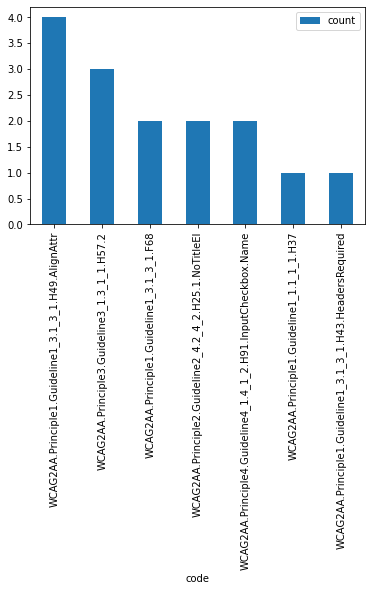

In [16]:
data_count.plot.bar(x='code')